In [60]:
import numpy as np
from hmmlearn import hmm
from matplotlib import pyplot as plt

In [61]:
A_internal = [[0.15, 0.05, 0.0, 0.8, 0.0, 0.0], [0.5, 0.25, 0.1, 0.0, 0.15, 0.0], [0.25, 0.0, 0.5, 0.125, 0.0, 0.125]]
T_internal = np.array(A_internal)
T_internal
# the first 3 columns refer to internal transitions, the last 3 columns refer to external transition to other components

array([[0.15 , 0.05 , 0.   , 0.8  , 0.   , 0.   ],
       [0.5  , 0.25 , 0.1  , 0.   , 0.15 , 0.   ],
       [0.25 , 0.   , 0.5  , 0.125, 0.   , 0.125]])

In [62]:
# probabilities external transitions, ie if there is an external transition, where does the transition lead?
A_external = [[0.0 for col in range(19)] for row in range(19)]
A_external[0][12] = 1

A_external[1][14] = 1

A_external[2][0] = .25
A_external[2][7] = .25
A_external[2][11] = .25
A_external[2][12] = .25

A_external[3][1] = 1

A_external[4][13] = 1

A_external[5][4] = 1

A_external[6][18] = 1

A_external[7][11] = .5
A_external[7][12] = .5

A_external[8][0] = .33
A_external[8][11] = .34
A_external[8][12] = .33

A_external[9][10] = 1

A_external[10][3] = 1

A_external[11][18] = 1

A_external[12][9] = 1

A_external[13][6] = 1

A_external[14][16] = 1

A_external[15][0] = .33
A_external[15][11] = .34
A_external[15][12] = .33

A_external[16][5] = 1

A_external[17][0] = .33
A_external[17][11] = .34
A_external[17][12] = .33

A_external[18][0] = .17
A_external[18][2] = .17
A_external[18][7] = .17
A_external[18][8] = .17
A_external[18][15] = .16
A_external[18][17] = .16

T_external = np.array(A_external)
T_external

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  ],
       [0.25, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.25, 0.  , 0.  , 0.  ,
        0.25, 0.25, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0

In [63]:
A_complete = [[0.0 for col in range(19 * 3)] for row in range(19 * 3)]
for x in range(19):
    for s in range(3):
        xs = x * 3 + s
        # internal transitions
        A_complete[xs][x * 3] = A_internal[s][0]
        A_complete[xs][x * 3 + 1] = A_internal[s][1]
        A_complete[xs][x * 3 + 2] = A_internal[s][2]
        for y in range(19):
            if y != x:
                # external transitions
                A_complete[xs][y * 3] = A_internal[s][3] * A_external[x][y]
                A_complete[xs][y * 3 + 1] = A_internal[s][4] * A_external[x][y]
                A_complete[xs][y * 3 + 2] = A_internal[s][5] * A_external[x][y]
T_complete = np.array(A_complete)
T_complete

array([[0.15   , 0.05   , 0.     , ..., 0.     , 0.     , 0.     ],
       [0.5    , 0.25   , 0.1    , ..., 0.     , 0.     , 0.     ],
       [0.25   , 0.     , 0.5    , ..., 0.     , 0.     , 0.     ],
       ...,
       [0.136  , 0.     , 0.     , ..., 0.15   , 0.05   , 0.     ],
       [0.     , 0.0255 , 0.     , ..., 0.5    , 0.25   , 0.1    ],
       [0.02125, 0.     , 0.02125, ..., 0.25   , 0.     , 0.5    ]])

In [64]:
model = hmm.GaussianHMM(n_components=19 * 3, covariance_type="spherical")
model

GaussianHMM(covariance_type='spherical', n_components=57)

In [65]:
startprob = [0.0] * (19 * 3)
startprob[0] = 1.0
model.startprob_ = np.array(startprob)
model.transmat_ = T_complete
model.features = 19 * 3

In [66]:
O_internal = np.array([[0.85, 0.15, 0.0, 0.0, 0.0, 0.0], [0.1, 0.6, 0.2, 0.0, 0.1, 0.0], [0.05, 0.0, 0.7, 0.1, 0.0, 0.15]])
O_internal

array([[0.85, 0.15, 0.  , 0.  , 0.  , 0.  ],
       [0.1 , 0.6 , 0.2 , 0.  , 0.1 , 0.  ],
       [0.05, 0.  , 0.7 , 0.1 , 0.  , 0.15]])

In [67]:
O_complete = [[0.0 for col in range(19 * 3)] for row in range(19 * 3)]
for x in range(19):
    for s in range(3):
        xs = x * 3 + s
        # internal transitions
        O_complete[xs][x * 3] = O_internal[s][0]
        O_complete[xs][x * 3 + 1] = O_internal[s][1]
        O_complete[xs][x * 3 + 2] = O_internal[s][2]
        for y in range(19):
            if y != x:
                # external transitions
                O_complete[xs][y * 3] = O_internal[s][3] * A_external[x][y]
                O_complete[xs][y * 3 + 1] = O_internal[s][4] * A_external[x][y]
                O_complete[xs][y * 3 + 2] = O_internal[s][5] * A_external[x][y]
O_complete = np.array(O_complete)
O_complete

array([[0.85  , 0.15  , 0.    , ..., 0.    , 0.    , 0.    ],
       [0.1   , 0.6   , 0.2   , ..., 0.    , 0.    , 0.    ],
       [0.05  , 0.    , 0.7   , ..., 0.    , 0.    , 0.    ],
       ...,
       [0.    , 0.    , 0.    , ..., 0.85  , 0.15  , 0.    ],
       [0.    , 0.017 , 0.    , ..., 0.1   , 0.6   , 0.2   ],
       [0.017 , 0.    , 0.0255, ..., 0.05  , 0.    , 0.7   ]])

In [68]:
model.means_ = O_complete
covar = 0.1 ** 323
model.covars_ = np.tile([covar], 3 * 19)

In [69]:
X, Z = model.sample(10000)
X = np.round(X, 8)
X

array([[ 0.85,  0.15, -0.  , ...,  0.  , -0.  ,  0.  ],
       [-0.  ,  0.  ,  0.  , ..., -0.  , -0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  , ..., -0.  ,  0.  , -0.  ],
       ...,
       [ 0.  , -0.  , -0.  , ...,  0.  , -0.  , -0.  ],
       [-0.  , -0.  , -0.  , ...,  0.  , -0.  , -0.  ],
       [-0.  , -0.  , -0.  , ..., -0.  , -0.  ,  0.  ]])

In [70]:
def discrete_trace(trace):
    new_trace = []
    for i in range(len(trace)):
        new_trace.append([])
        probs = trace[i]
        chosen = np.random.choice(len(probs), 1, p=probs)[0]
        for j in range(len(probs)):
            new_trace[i].append(1 if j == chosen else 0)
    return new_trace

In [71]:
def get_transformation(means):
    transformation = [-1] * len(means)
    for i in range(len(means)):
        max_value = 0
        max_index = -1
        mean = means[i]
        for j in range(len(mean)):
            if mean[j] > max_value:
                max_value = mean[j]
                max_index = j
        transformation[i] = max_index
    return transformation

In [72]:
def transform(matrix, transformation):
    new_matrix = [[-1 for col in range(len(matrix))] for row in range(len(matrix))]
    for i in range(len(matrix)):
        for j in range(len(matrix[i])):
            new_matrix[transformation[i]][transformation[j]] = matrix[i][j]
    return new_matrix

In [73]:
def transition_matrix(trace, iterations):
    remodel = hmm.GaussianHMM(n_components = 19 * 3, covariance_type='full', n_iter = iterations)
    remodel.fit(trace)
    transform_remodel = get_transformation(remodel.means_)
    return transform(remodel.transmat_, transform_remodel)

In [74]:
X_discrete = discrete_trace(X)

In [78]:
np.array(transition_matrix(X_discrete, 1000))

array([[0.12621359, 0.0776699 , 0.00970874, ..., 0.        , 0.        ,
        0.        ],
       [0.21590909, 0.14772727, 0.01136364, ..., 0.01136364, 0.01136364,
        0.01136364],
       [0.375     , 0.24999999, 0.25000001, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.1055341 , 0.02187902, 0.        , ..., 0.12612613, 0.05920206,
        0.01287001],
       [0.10106383, 0.0106383 , 0.00531915, ..., 0.18085106, 0.12765958,
        0.03723404],
       [0.05555555, 0.        , 0.        , ..., 0.27777779, 0.08333333,
        0.3611111 ]])

In [76]:
def plot_probs(trace, length):
    x = np.arange(0, length, 1)
    probs = [[[-1 for dep in x] for col in range(19 * 3)] for row in range(19 * 3)]
    for i in x:
        trans = transition_matrix(trace, i)
        for j in range(len(trans)):
            for k in range(len(trans[j])):
                probs[j][k][i] = trans[j][k]
    for j in range(len(probs)):
        for k in range(len(probs[j])):
            y = probs[j][k]
            plt.plot(x, y, label=str(j) + " -> " + str(k))
    # plt.legend(loc='right', shadow=True, fontsize='x-large')

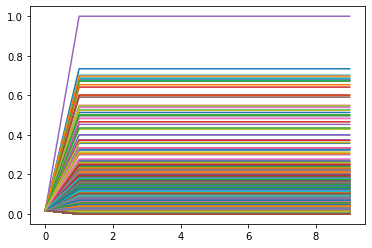

In [77]:
plot_probs(X_discrete, 10)

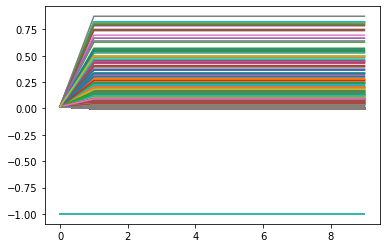

In [79]:
plot_probs(X, 10)